In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [74]:
df.columns
df.shape

(51717, 17)

In [75]:
df.drop(columns=["url","address","phone","reviews_list","menu_item","dish_liked"],inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [84]:
def handle(data):
    if data=="NEW" or data=="-":
        return np.nan
    else:
        value=str(data).split("/")
        value=value[0]
        return float(value)
df["rate"]=df["rate"].apply(handle)
# plt.hist(df.rate)

In [85]:
df.drop_duplicates(inplace=True)

In [86]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           4869
votes                             0
location                          0
rest_type                       118
cuisines                         18
approx_cost(for two people)     178
listed_in(type)                   0
dtype: int64

In [87]:
df = df[df.location.notnull()]

In [88]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           4869
votes                             0
location                          0
rest_type                       118
cuisines                         18
approx_cost(for two people)     178
listed_in(type)                   0
dtype: int64

In [89]:
df.shape

(31922, 10)

In [90]:
df.drop(columns=["listed_in(city)"],inplace=True)

KeyError: "['listed_in(city)'] not found in axis"

In [91]:
d=list(set(df["location"].to_list()))
l=[]
for i in d:
    new_df = df[(df["location"]==i)&(df["rate"].notnull())]
    temp =float(round(new_df.rate.mean(),1))
    l.append([temp,i])

In [92]:
for i in range(len(d)):
    df.loc[df["location"] == d[i], "rate"] = (df.loc[df["location"] == d[i], "rate"]).fillna(l[i][0])
# df.isnull().sum()
df = df[df["location"]!="Jakkur"]
df.rate.isnull().sum()

np.int64(0)

In [93]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

In [94]:
df.rename(columns={"approx_cost(for two people)":"CostforPair","listed_in(type)":"Type"},inplace=True)

C:\Users\H.P\AppData\Local\Temp\ipykernel_113008\378861946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"approx_cost(for two people)":"CostforPair","listed_in(type)":"Type"},inplace=True)


In [95]:
df.isnull().sum()

name              0
online_order      0
book_table        0
rate              0
votes             0
location          0
rest_type       118
cuisines         18
CostforPair     178
Type              0
dtype: int64

In [96]:
df.CostforPair.dtype

dtype('O')

In [97]:
def con(data):
    data = str(data)
    if "," in data:
        value = data.replace(",","")
        return float(value)
    else:
        return float(data)
df.CostforPair = df.CostforPair.apply(con)

C:\Users\H.P\AppData\Local\Temp\ipykernel_113008\1005089842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CostforPair = df.CostforPair.apply(con)


In [98]:
df.CostforPair.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [99]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'CostforPair', 'Type'],
      dtype='object')

In [100]:
df.groupby("cuisines")["CostforPair"].mean()

cuisines
African, Burger                                                      1000.000000
African, Burger, Desserts, Beverages, Fast Food                      1000.000000
American                                                              783.333333
American, Asian, Continental, North Indian, South Indian, Chinese    1200.000000
American, Asian, European, North Indian                              1400.000000
                                                                        ...     
Turkish, Fast Food, Biryani, Chinese                                  350.000000
Turkish, Rolls                                                        300.000000
Vietnamese                                                           1105.882353
Vietnamese, Salad                                                    1100.000000
Vietnamese, Thai, Burmese, Japanese                                  1000.000000
Name: CostforPair, Length: 2722, dtype: float64

In [101]:
df.CostforPair.mean()

np.float64(605.1563494313707)

In [102]:
df.groupby("location")["CostforPair"].mean()

location
BTM                  421.111111
Banashankari         425.900178
Banaswadi            412.878788
Bannerghatta Road    469.823702
Basavanagudi         346.905312
                        ...    
West Bangalore       350.000000
Whitefield           622.125206
Wilson Garden        410.091743
Yelahanka            310.000000
Yeshwantpur          426.315789
Name: CostforPair, Length: 92, dtype: float64

In [103]:
df.groupby("Type")["CostforPair"].mean().to_dict()

{'Buffet': 1338.486312399356,
 'Cafes': 648.4442523768366,
 'Delivery': 496.3475803115952,
 'Desserts': 405.2127183161666,
 'Dine-out': 635.5759273406333,
 'Drinks & nightlife': 1457.52009184845,
 'Pubs and bars': 1334.4076655052265}

(array([2.1794e+04, 6.9050e+03, 2.2670e+03, 4.4300e+02, 2.7300e+02,
        3.3000e+01, 2.3000e+01, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  40.,  636., 1232., 1828., 2424., 3020., 3616., 4212., 4808.,
        5404., 6000.]),
 <BarContainer object of 10 artists>)

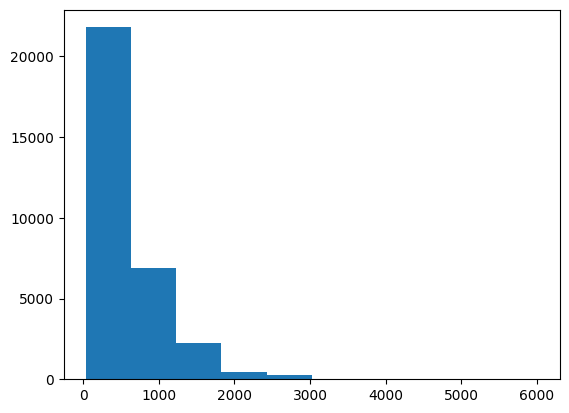

In [104]:
plt.hist(df.CostforPair)

In [105]:
df.isnull().sum()

name              0
online_order      0
book_table        0
rate              0
votes             0
location          0
rest_type       118
cuisines         18
CostforPair     178
Type              0
dtype: int64

In [106]:

df = df[(df.rest_type.notnull())&(df.cuisines.notnull())]
df.isnull().sum()

name              0
online_order      0
book_table        0
rate              0
votes             0
location          0
rest_type         0
cuisines          0
CostforPair     171
Type              0
dtype: int64

In [107]:
df.CostforPair.fillna(df.CostforPair.mean(),inplace=True)
df.shape

C:\Users\H.P\AppData\Local\Temp\ipykernel_113008\2345298912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.CostforPair.fillna(df.CostforPair.mean(),inplace=True)


(31785, 10)

In [108]:
temp=df.cuisines.value_counts()



In [109]:
temp = temp[temp<100]
temp

cuisines
Cafe, Desserts                                  99
Fast Food, Rolls                                98
Andhra, Biryani                                 98
Andhra                                          98
Arabian                                         94
                                                ..
Chinese, Cafe                                    1
Italian, North Indian, South Indian, Chinese     1
North Indian, Chinese, Kebab, Biryani            1
South Indian, Biryani, Chettinad, Juices         1
Desserts, North Indian, Chinese                  1
Name: count, Length: 2663, dtype: int64

In [110]:
def con(data):
    if data in temp:
        return "others"
    else:
        return data
df.cuisines = df.cuisines.apply(con)
df.cuisines.unique()

array(['others', 'South Indian, North Indian', 'North Indian', 'Cafe',
       'Cafe, Continental', 'Cafe, Fast Food', 'Bakery, Desserts',
       'Pizza', 'Biryani', 'North Indian, Chinese, Fast Food',
       'South Indian', 'Burger, Fast Food', 'Pizza, Fast Food',
       'North Indian, Chinese', 'Chinese, Thai', 'Ice Cream, Desserts',
       'Desserts, Beverages', 'Chinese', 'Bakery', 'Fast Food',
       'Mithai, Street Food', 'South Indian, Chinese',
       'Biryani, North Indian, Chinese', 'Desserts', 'Ice Cream',
       'South Indian, North Indian, Chinese', 'South Indian, Biryani',
       'Beverages', 'Chinese, North Indian',
       'South Indian, North Indian, Chinese, Street Food', 'Street Food',
       'Desserts, Ice Cream', 'North Indian, Chinese, Biryani',
       'Beverages, Fast Food', 'North Indian, Chinese, South Indian',
       'North Indian, Fast Food', 'North Indian, South Indian',
       'North Indian, Biryani', 'Finger Food', 'Continental',
       'Fast Food, Beverages

In [111]:
df = df[df.cuisines.notnull()]

In [112]:
df.cuisines.isnull().sum()

np.int64(0)

In [113]:
df = df[df.rest_type.notnull()]

In [114]:
temp = df.rest_type.value_counts()
temp = temp[temp<1000]


In [115]:
def conve(data):
    if data in temp:
        return "others"
    else:
        return data
df.rest_type=df.rest_type.apply(conve)

    

In [116]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,CostforPair,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,others,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.6,0,Whitefield,others,Finger Food,600.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.6,0,Whitefield,others,Finger Food,2000.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",others,Finger Food,2500.0,Pubs and bars


In [117]:
df.rest_type.value_counts()

rest_type
Quick Bites           10957
others                 7659
Casual Dining          6997
Cafe                   2396
Dessert Parlor         1360
Delivery               1333
Takeaway, Delivery     1083
Name: count, dtype: int64

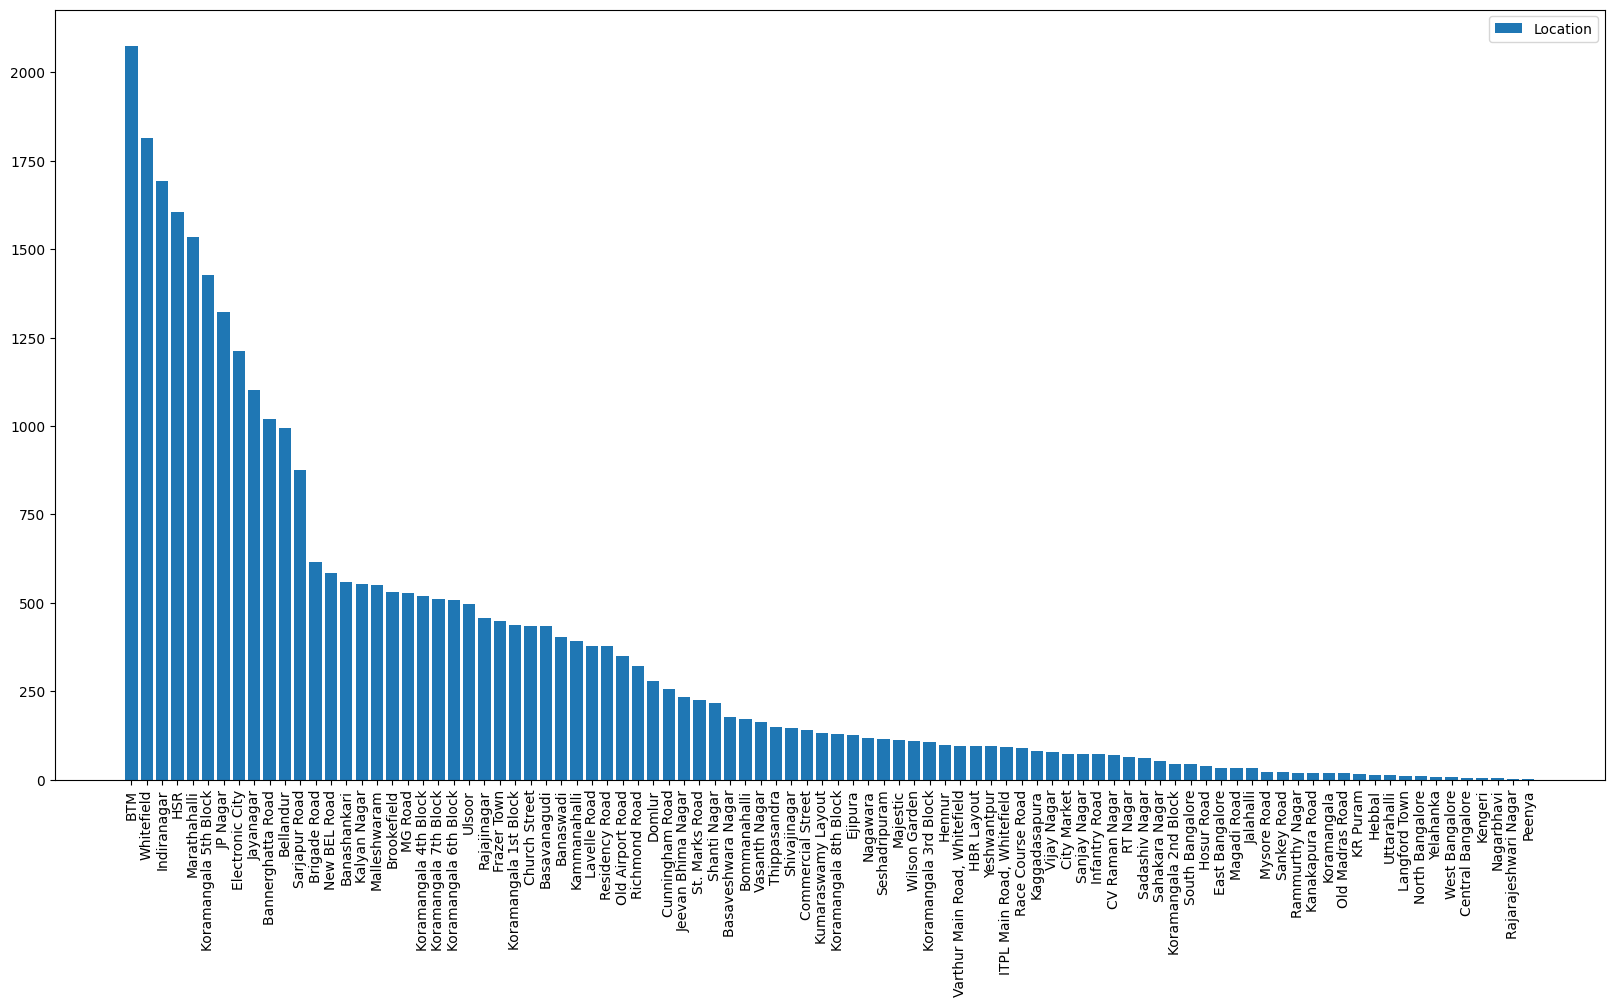

In [118]:
import seaborn as sns
temp=df.location.value_counts().to_dict()
l =list(temp.keys())
value=list(temp.values())

plt.figure(figsize=(20,10))
plt.bar(l,value,label="Location")
plt.xticks(rotation=90)
plt.legend()

plt.show()

In [146]:
temp_yes = df[df["online_order"]=="Yes"]
temp_no=df[df["online_order"]=="No"]


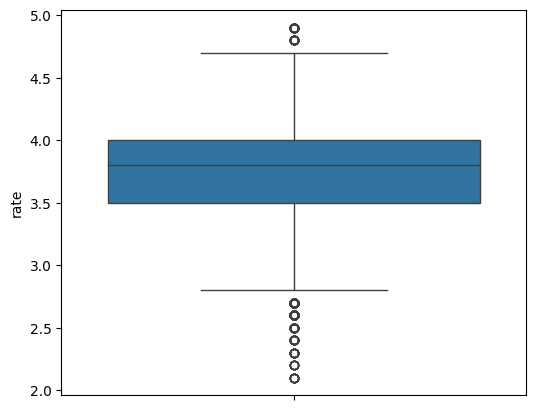

np.float64(3.760307740618621)

In [147]:
plt.figure(figsize=(6,5))
sns.boxplot(temp_yes["rate"],label="Yes")

plt.show()
temp_yes.rate.mean()

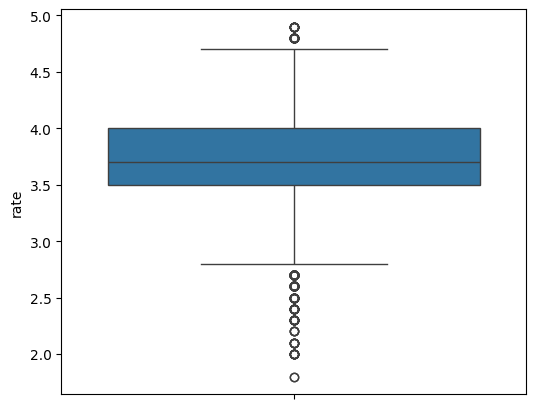

np.float64(3.711026975863701)

In [136]:
plt.figure(figsize=(6,5))
sns.boxplot(temp_no["rate"],label="No")
plt.show()
temp_no.rate.mean()

In [148]:
temp_yes = df[df["book_table"]=="Yes"]
temp_no=df[df["book_table"]=="No"]


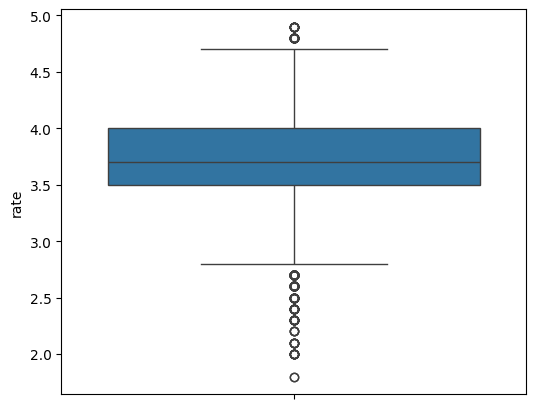

In [141]:
plt.figure(figsize=(6,5))
sns.boxplot(temp_no["rate"],label="No")
plt.show()
# temp_no.rate.mean()

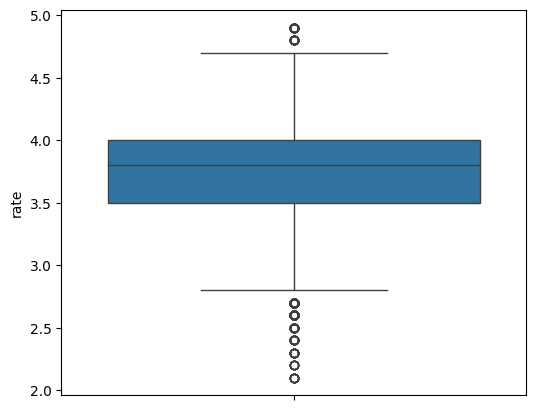

In [140]:
plt.figure(figsize=(6,5))
sns.boxplot(temp_yes["rate"],label="yes")
plt.show()

In [183]:
temp=df.groupby("Type")["votes"].sum().to_dict()
print(temp)

{'Buffet': 779768, 'Cafes': 716064, 'Delivery': 4072656, 'Desserts': 443024, 'Dine-out': 4521660, 'Drinks & nightlife': 1192472, 'Pubs and bars': 677878}


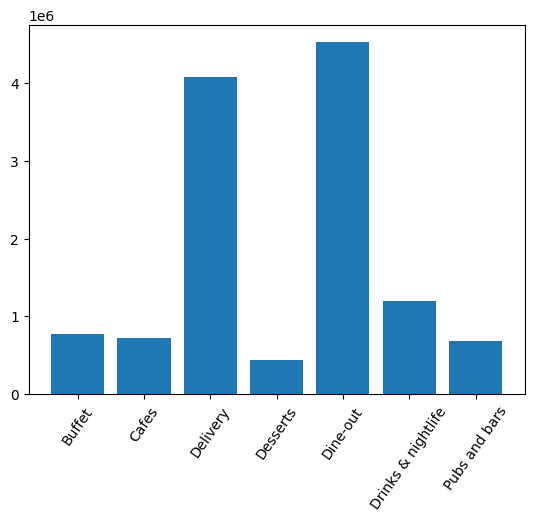

In [187]:
plt.bar(temp.keys(),temp.values())
plt.xticks(rotation=55)
plt.show()

In [198]:
temp=df.groupby("location")["votes"].sum().to_dict()
# temp
temp

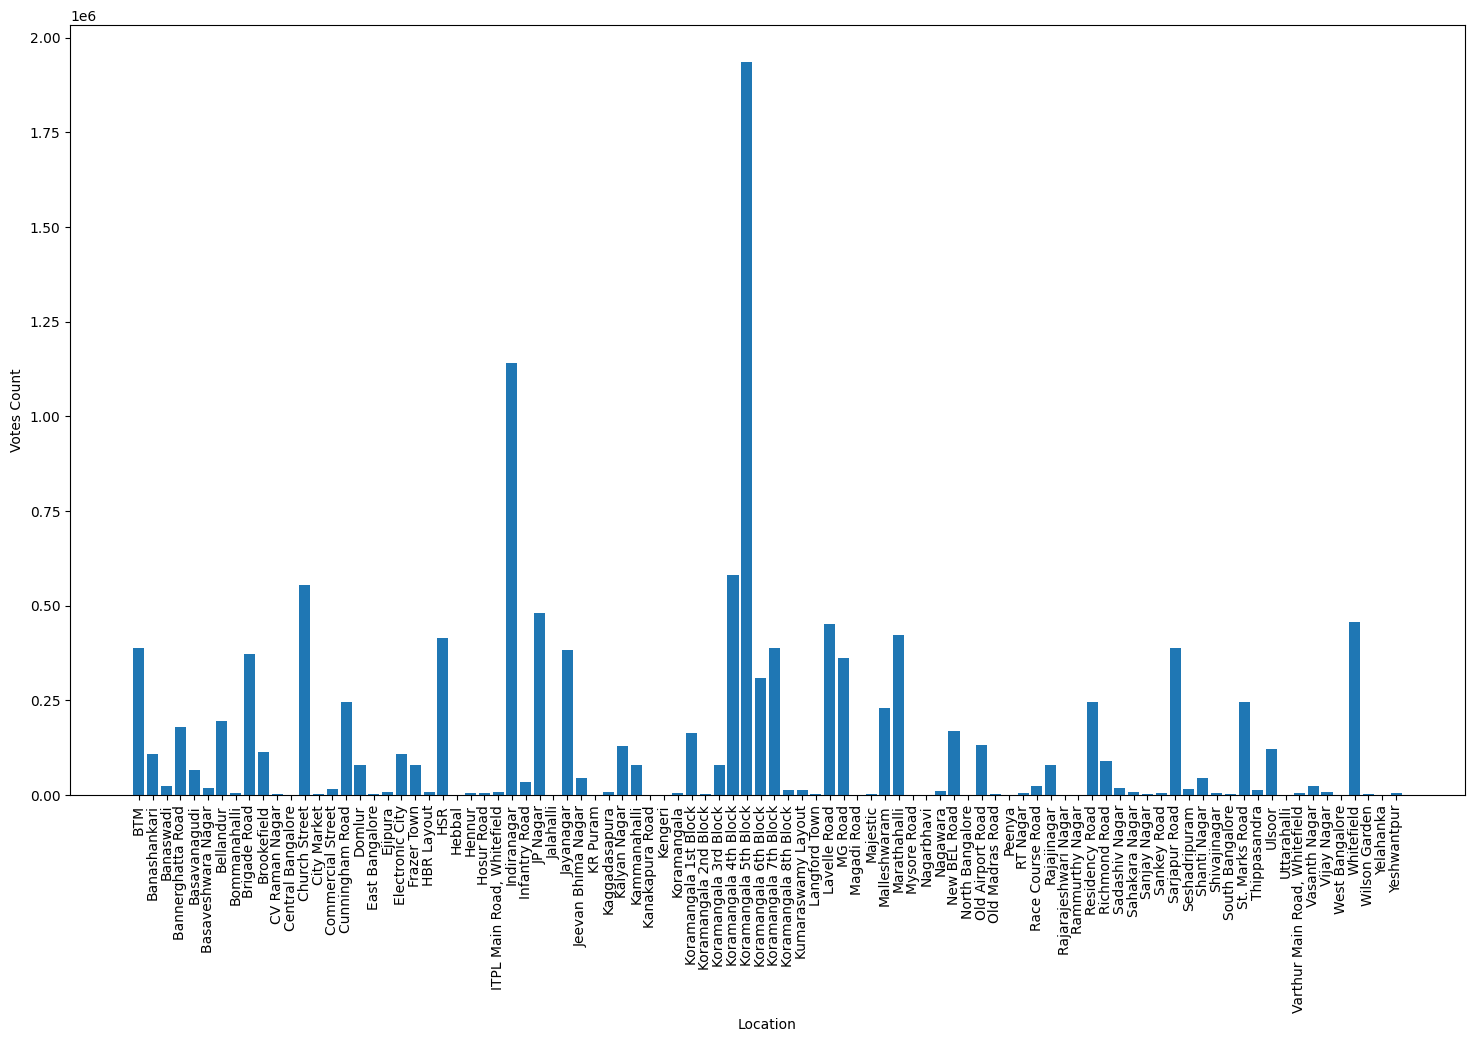

In [197]:

plt.figure(figsize=(18,10))
plt.bar(temp.keys(),temp.values())
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Votes Count")
plt.show()

In [201]:
temp=df.groupby("location")["votes"].mean().to_dict()

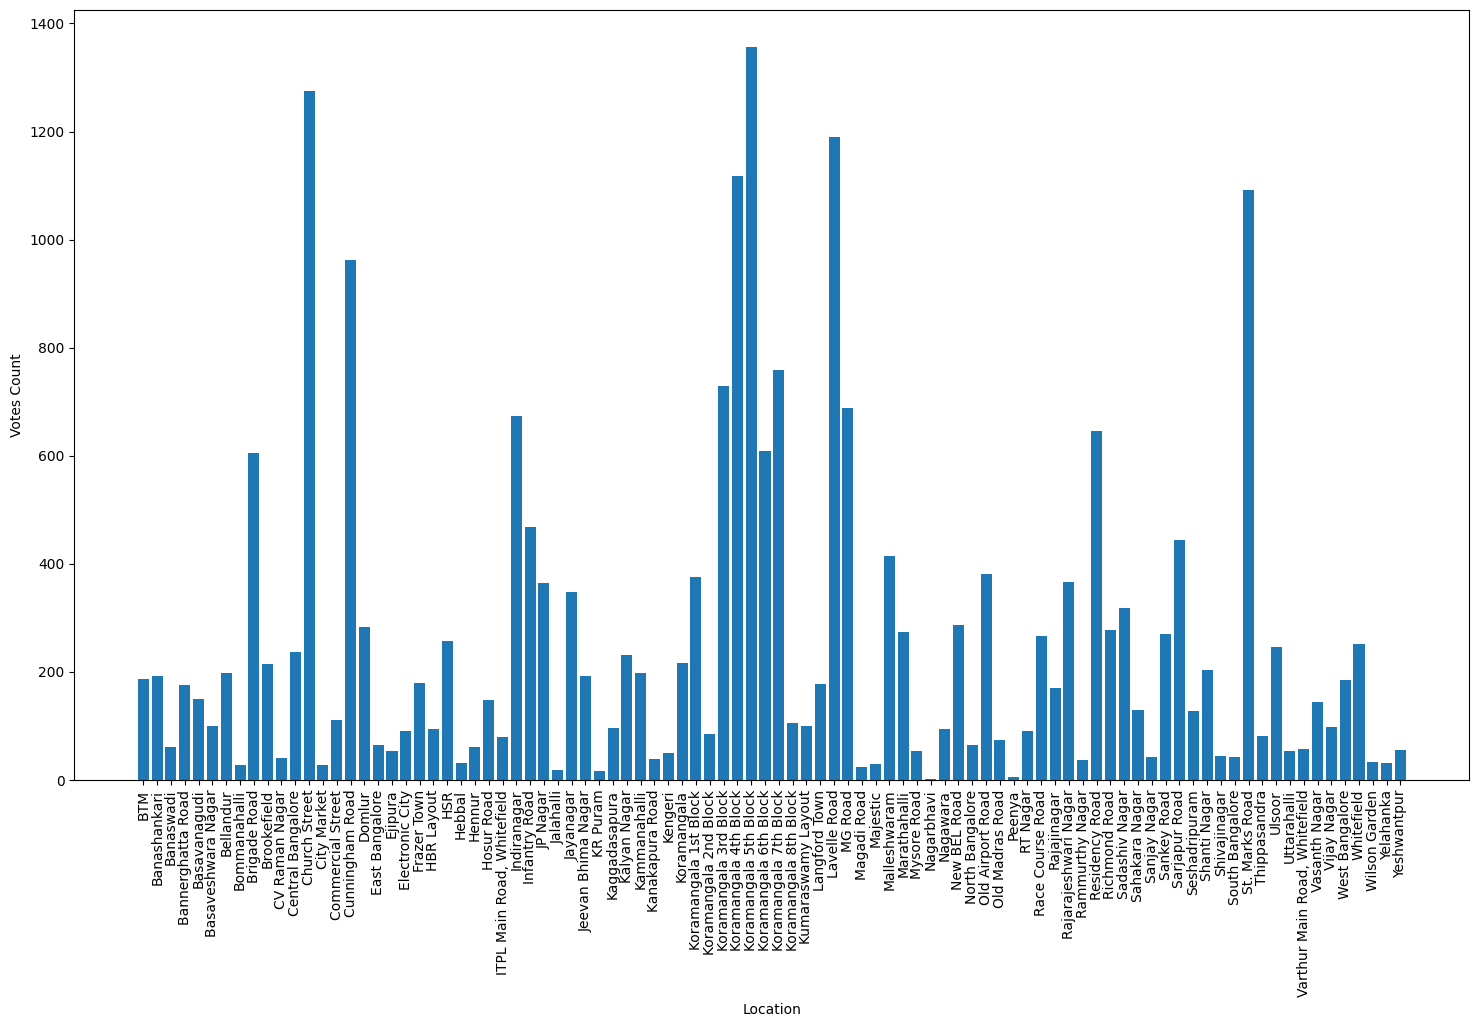

In [202]:
plt.figure(figsize=(18,10))
plt.bar(temp.keys(),temp.values())
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Votes Count")
plt.show()

In [203]:
temp=df.groupby("location")["rate"].mean().to_dict()

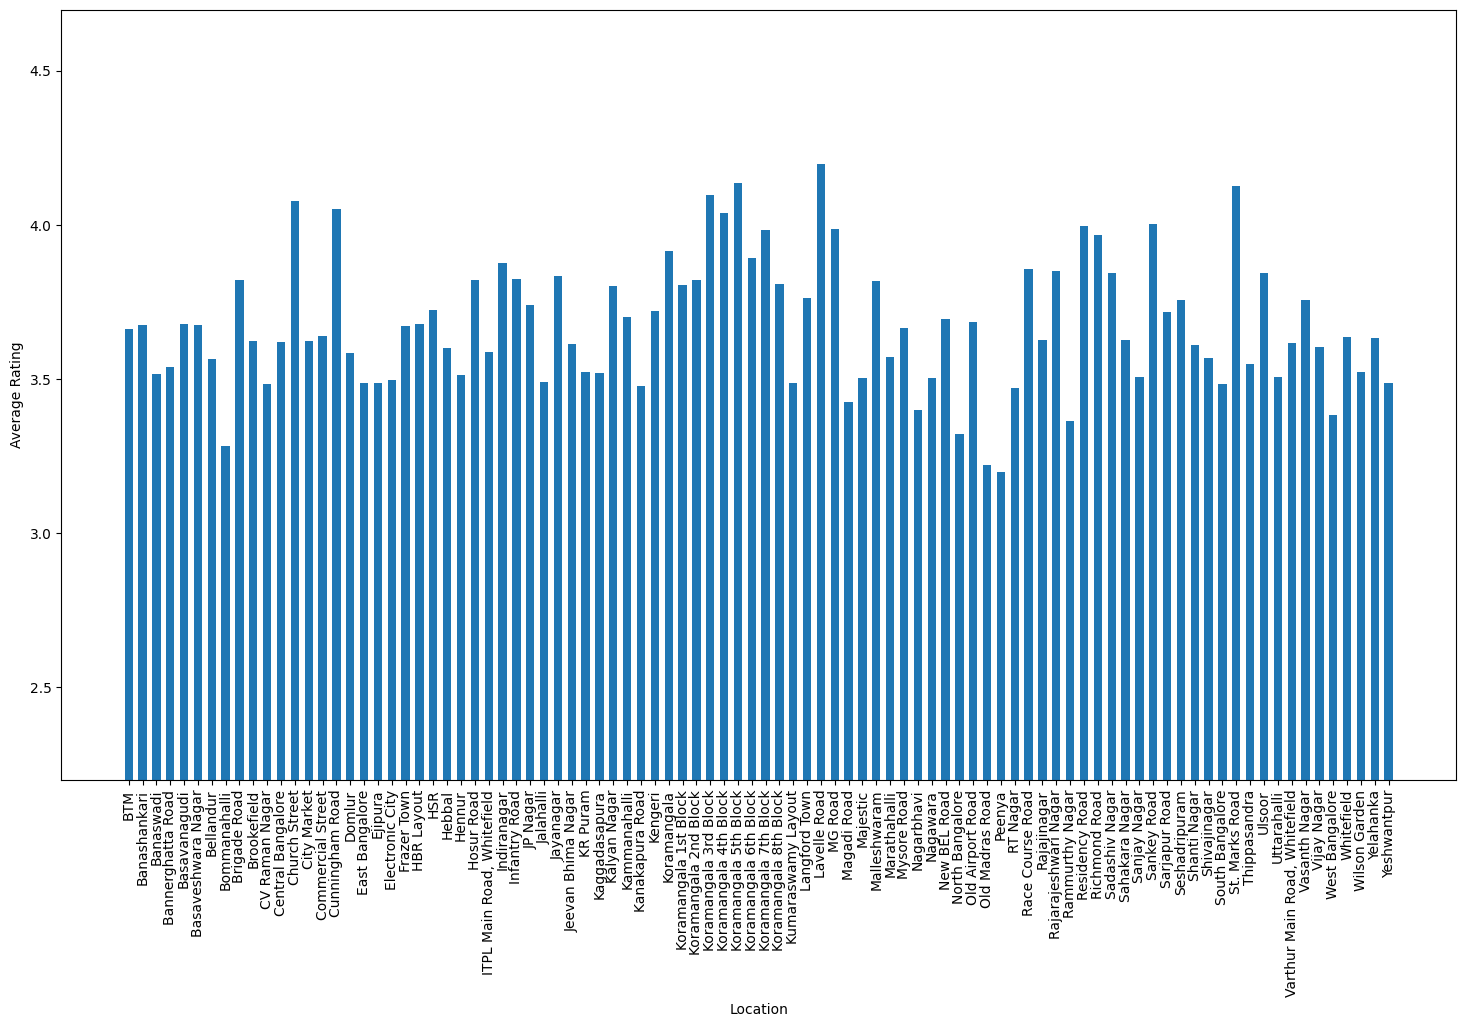

In [208]:
plt.figure(figsize=(18,10))
plt.bar(temp.keys(),temp.values(),width=0.6)
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.ylim(min(temp.values())-1,max(temp.values())+0.5)
plt.show()

In [211]:
temp=df.groupby("cuisines")["rate"].mean().to_dict()

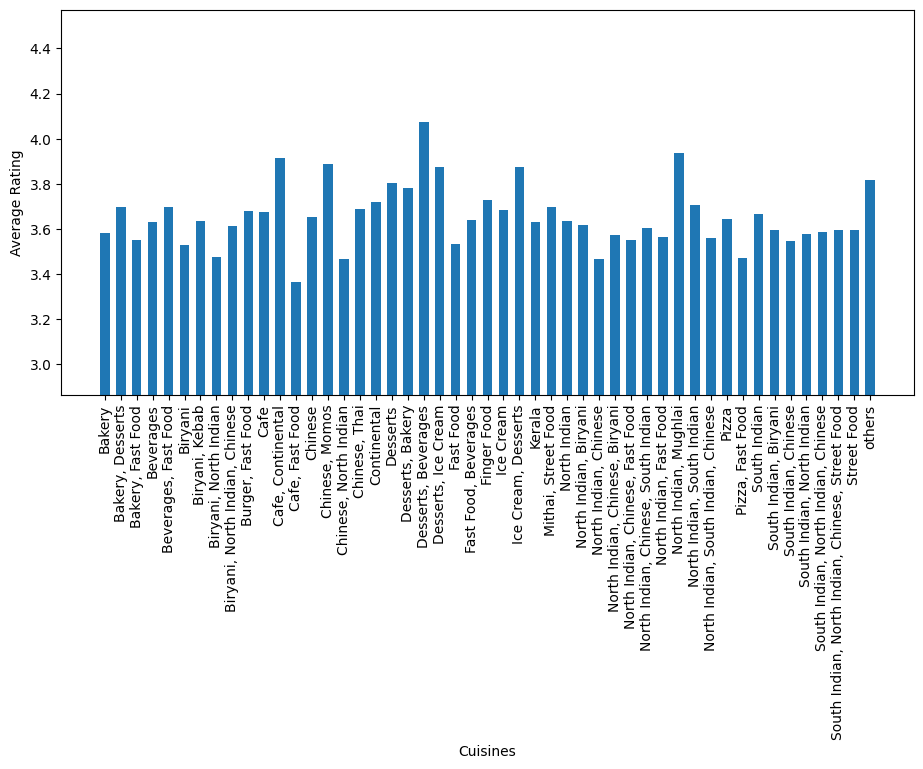

In [221]:
plt.figure(figsize=(11,5))
plt.bar(temp.keys(),temp.values(),width=0.6)
plt.xticks(rotation=90)
plt.xlabel("Cuisines")
plt.ylabel("Average Rating")
plt.ylim(min(temp.values())-0.5,max(temp.values())+0.5)
plt.show()

In [230]:
temp = df.groupby(["location","cuisines"])["cuisines"].count().to_dict()

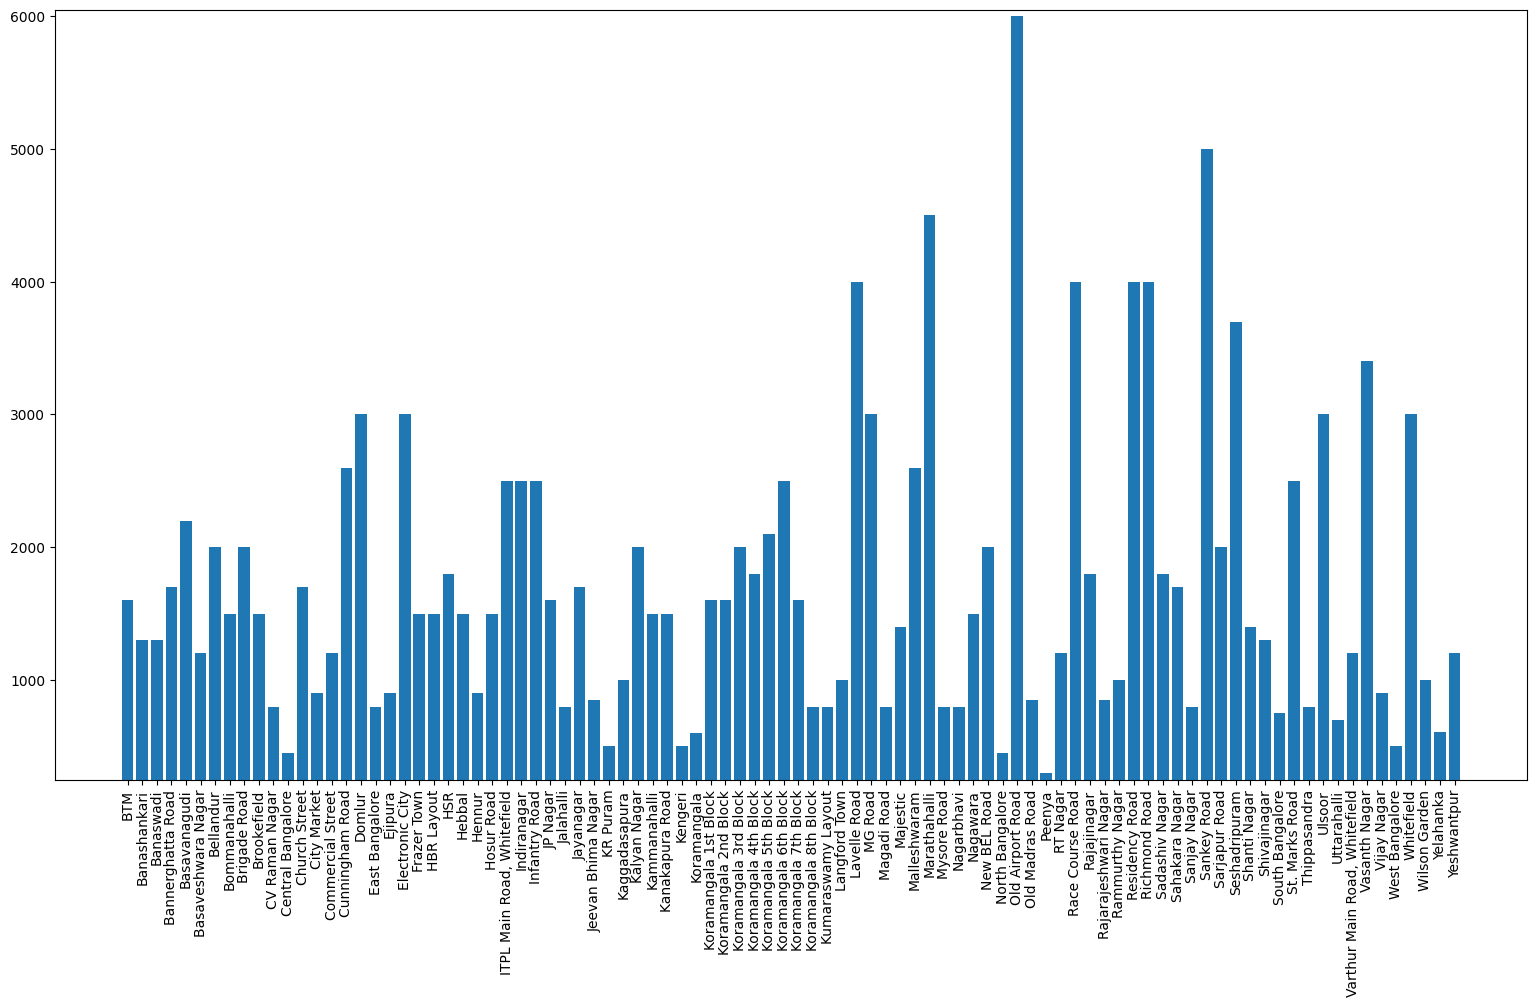

In [246]:
temp = df.groupby("location")["CostforPair"].max().to_dict()
# temp
plt.figure(figsize=(19,10))
plt.bar(temp.keys(),temp.values())
plt.xticks(rotation=90)
plt.ylim(min(temp.values())-50,max(temp.values())+50)
plt.show()

In [250]:
temp = df.groupby("name")["CostforPair"].max().to_dict()
### Most Expension Restaurant (CostforPair)->Le Cirque Signature - The Leela Palace 6000.0

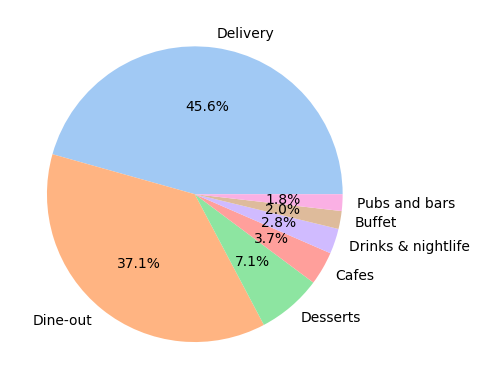

In [266]:
temp = df.Type.value_counts().to_dict()
Type_list=list(temp.keys())
type_count=list(temp.values())
colors = sns.color_palette("pastel", len(temp))
plt.pie(temp.values(),labels=list(temp.keys()),autopct='%1.1f%%',colors=colors)
plt.show()

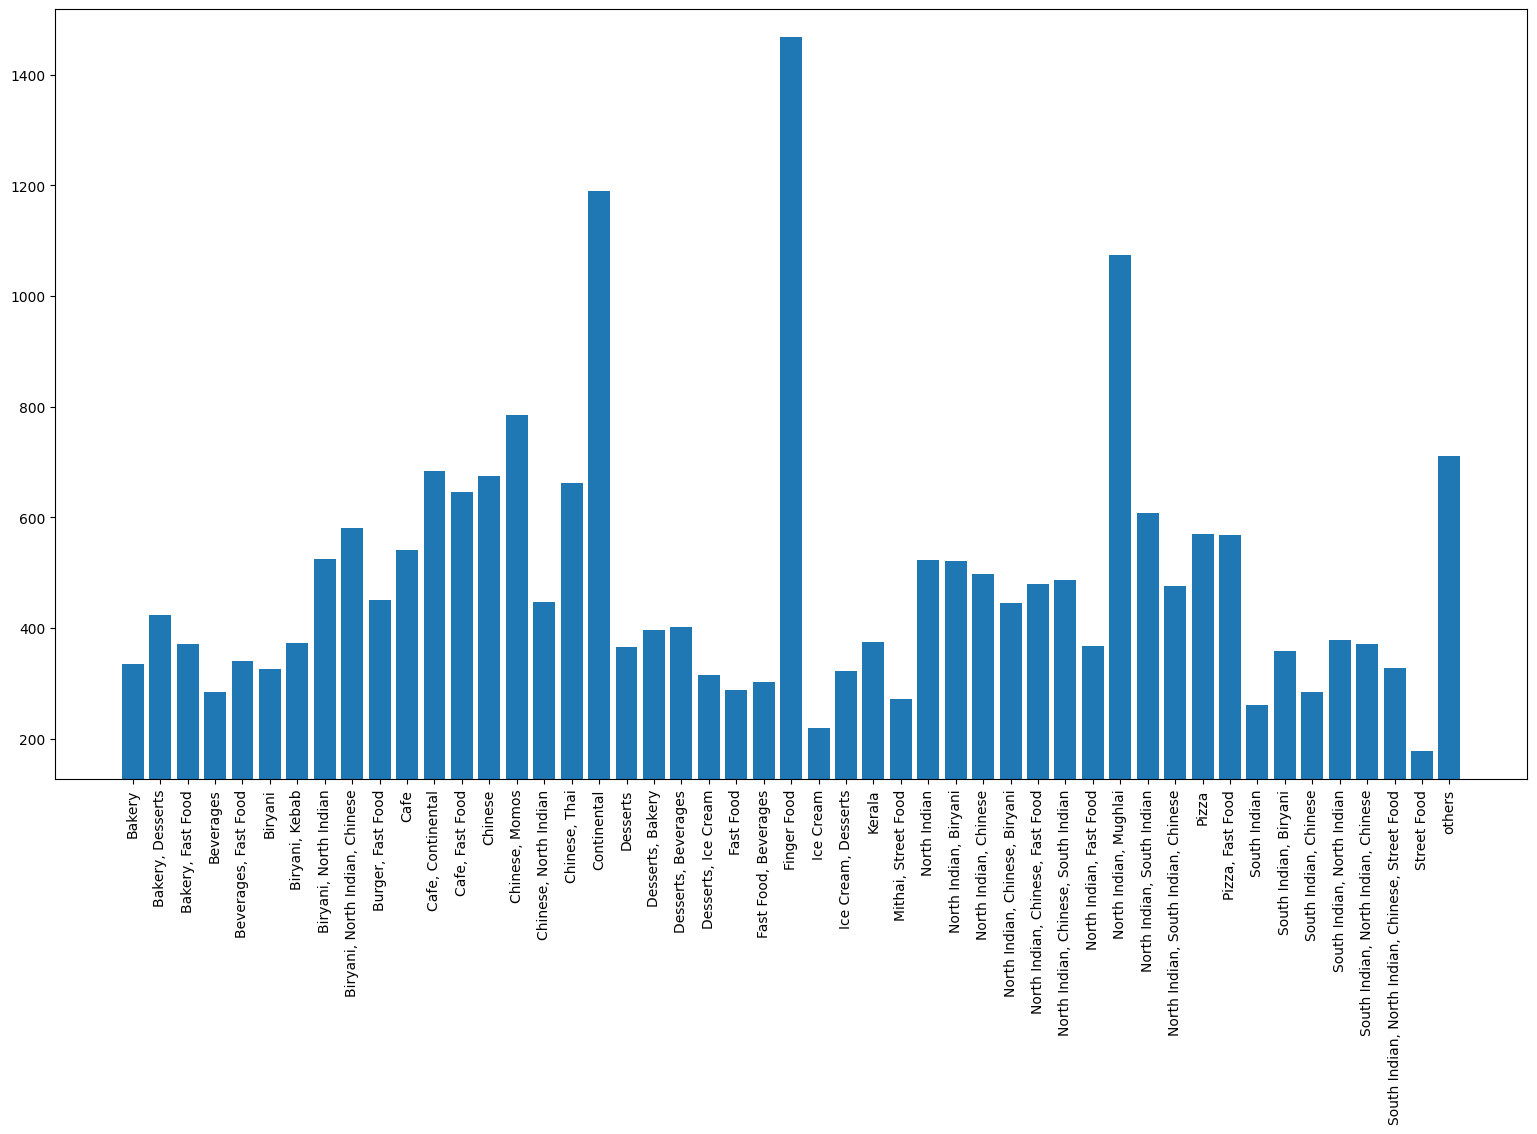

In [268]:
temp = df.groupby("cuisines")["CostforPair"].mean().to_dict()
# temp
plt.figure(figsize=(19,10))
plt.bar(temp.keys(),temp.values())
plt.xticks(rotation=90)
plt.ylim(min(temp.values())-50,max(temp.values())+50)
plt.show()